In [3]:
#Importing the libraries
import matplotlib.pyplot as plt #plot nice charts in Python
import pandas as pd #import and manage datasets

#importing the datasets
dataset = pd.read_csv('Age_Salary_Data.csv')

#create matrix of features and dependent var vector
X = dataset.iloc[:, :-1].values #matrix of features
y = dataset.iloc[:, -1:].values #dependent var vector


In [4]:
#Handle missing data
from sklearn.preprocessing import Imputer #import Imputer class
imputer = Imputer(missing_values = 'NaN', strategy = 'mean', axis=0) #create object, impute along column
imputer = imputer.fit(X[: , 0:1]) #run calculations  and save values such as mean, SD, etc
X[: , 0:1] = imputer.transform(X[: , 0:1]) #transform the data using the values calculated above

imputer = imputer.fit(y[: , 0:1]) #run calculations  and save values such as mean, SD, etc
y[: , 0:1] = imputer.transform(y[: , 0:1]) #transform the data using the values calculated above

In [5]:
#Split dataset in to training and test sets
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#Fitting simple linear regression to the training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

#Predicting the test set results
y_pred_test = regressor.predict(X_test)
y_pred_train = regressor.predict(X_train)

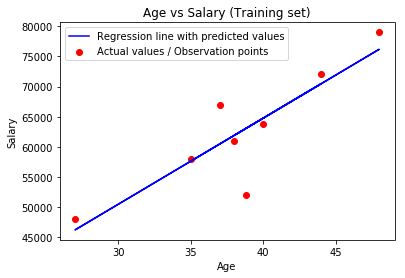

In [6]:
#Visualise the Training test results
#observation points
plt.scatter(X_train, y_train, color = 'red', label = 'Actual values / Observation points')
#regression line with predictions
plt.plot(X_train, y_pred_train, color = 'blue', label = 'Regression line with predicted values')
plt.title('Age vs Salary (Training set)')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.legend(loc = 'upper left')
plt.show()

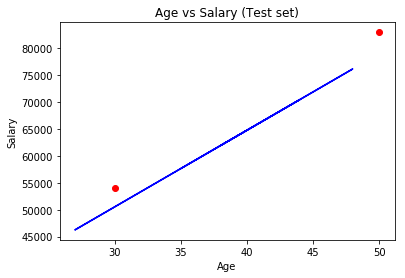

In [7]:
#Visualise the Test set results
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, y_pred_train, color = 'blue')
plt.title('Age vs Salary (Test set)')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.show()